current plot is  Review
current plot is  Experiment
current plot is  Theory
[ 3.60260543e+09  1.26802869e+00 -3.18441586e+00]
sum_error**2 15.19116143067928
popt: [ 3.60260543e+09  1.26802869e+00 -3.18441586e+00]
系数A: 3602605427.670431
系数n: 1.2680286923906992
系数EA: -3.1844158637164193
系数协方差: [[ 2.13520078e+19 -7.70374291e+08  4.80617935e+11]
 [-7.70374291e+08  2.78754683e-02 -1.71317737e+01]
 [ 4.80617935e+11 -1.71317737e+01  1.17579238e+04]]
参数标准差: [4.62082328e+09 1.66959481e-01 1.08433960e+02]
RSE: 0.7070190483409702
RSE2: 0.7070190483409702
std: 0.25699908163157525
系数yvals: [12.70228744 12.85956086 12.98175405 13.08169715 13.16625832 13.23954682
 13.3042176  13.36208575 13.41444714 13.46225935 13.50625004 13.54698516
 13.58491353 13.62039713 13.65373213 13.68516396 13.71489822 13.74310894
 13.76994465 13.79553319 13.81998534 13.84339778 13.86585531]


c:\Users\renxinrui\Documents\Wmp\rxr\rxr_uncertainty_overall\Utils\fit.py:140: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rangeGap = np.array(rangeGap)


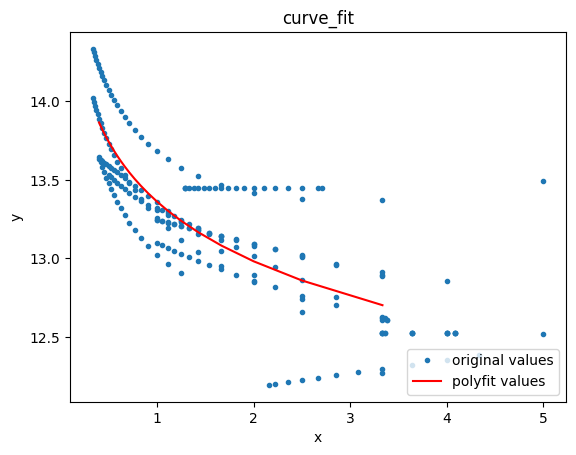

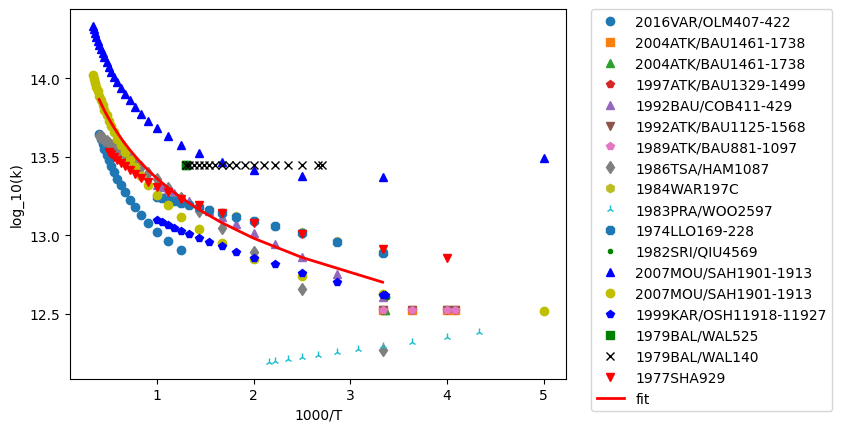

want to find  HO2+H<=>H2+O2
TT find it  HO2+H<=>H2+O2                                                +1.1402000E+010 +1.0827000E+000 +5.5378000E+002   !\AUTHOR: AK !\REF:MICHAEL SUTHERLAND 2000 !\COMMENT:

HO2 H H2 O2
hen find it  H+HO2=H2+O2                                             2.8000e+06    2.090     -1451.00



In [1]:
from Utils.DataConvert import ConvertData
from Utils.fit import Fit
from Utils.FindReaction import FindReaction
from Utils.Format import Format
from Utils.GetFileDir import GetFileDir
from Utils.GetReactionNum import GetReactionNum
import math

reactionnum = GetReactionNum()
excelname = GetFileDir(reactionnum,'forwardexcel')
outname = GetFileDir(reactionnum,'forwardtxt')

#转换web excel数据到txt文件
ConvertData(excelname, outname)
#拟合数据
A,n,EAR = Fit(outname,reactionnum)
K0 = 0
#把拟合的数据写入文件
fd = open(outname,'a+')
fitoneLine = Format('fit','fit',300,2500,A,n,EAR,K0)
fd.write(fitoneLine) 

#把TT和henrry数据写入文件,根据excel的名字来找到反应
ttdata,hendata = FindReaction(excelname)
A = float(ttdata[0])
n = float(ttdata[1])
EA = float(ttdata[2])
EAR = EA/1.987
K0 = 0
ttoneLine = Format('Compare','taotao',300,2500,A,n,EAR,K0)
fd.write(ttoneLine) 

#有可能找不到henry的数据
if(len(hendata) != 0):
    A = float(hendata[0])
    n = float(hendata[1])
    EA = float(hendata[2])
    EAR = EA/1.987
    K0 = 0
    henoneLine = Format('0','henry',300,2500,A,n,EAR,K0)
    fd.write(henoneLine)
fd.close()